In [1]:
%matplotlib inline
import pandas;

In [2]:
#表示列・行　　３０列・１０行

pandas.options.display.max_columns = 30
pandas.options.display.max_rows = 10

In [3]:
url = 'http://npb.jp/bis/players/61265112.html' #平田選手のページ
df = pandas.io.html.read_html(url)

In [10]:
#1つめのデータフレーム（成績部分）取得
df[1]

,年度,所属球団,試合,打席,打数,得点,安打,二塁打,三塁打,本塁打,塁打,打点,盗塁,盗塁刺,犠打,犠飛,四球,死球,三振,併殺打,打率,長打率,出塁率
0,2006.0,中 日,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,0.000
1,2007.0,中 日,3,13,12,1,4,0,0,0,4,3,0,1,0,0,0,1,4,0,0.333,0.333,0.385
2,2008.0,中 日,59,111,97,9,26,3,0,1,32,9,0,1,5,2,6,1,25,4,0.268,0.330,0.311
3,2009.0,中 日,42,95,85,13,23,7,3,2,42,9,0,0,0,1,8,1,19,2,0.271,0.494,0.337
4,2010.0,中 日,6,12,12,0,1,0,0,0,1,0,0,0,0,0,0,0,4,0,0.083,0.083,0.083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,2015.0,中 日,130,559,491,76,139,27,3,13,211,53,11,7,1,0,64,3,86,5,0.283,0.430,0.369
10,2016.0,中 日,118,494,416,61,103,24,1,14,171,73,4,2,0,4,72,2,89,5,0.248,0.411,0.358
11,2017.0,中 日,66,270,238,26,58,14,2,6,94,29,4,0,0,2,29,1,60,4,0.244,0.395,0.326
12,2018.0,中 日,138,568,493,83,162,26,5,9,225,55,8,7,2,3,67,3,69,7,0.329,0.456,0.410


In [11]:
#2010年より前の成績および通算成績をドロップ
atbats = df[1].drop([0,1,2,3,4,13])

In [12]:
#　カラム名を付与する(野球英語の略称)
atbats.columns = ['year', 'team', 'g', 'pa', 'ab', 'r', 'h', '_2b', '_3b', 'hr', 'tb', 'rbi', 'sb', 'cs', 'sh', 'sf', 'bb', 'hbp', 'so', 'dp', 'ba', 'slg', 'obp']

In [13]:
#各カラムを加工
import numpy as np
atbats['year'] = atbats['year'].fillna(0).astype(np.float64)
atbats['g'] = atbats['g'].fillna(0).astype(np.float64)
atbats['pa'] = atbats['pa'].fillna(0).astype(np.float64)
atbats['ab'] = atbats['ab'].fillna(0).astype(np.float64)
atbats['r'] = atbats['r'].fillna(0).astype(np.float64)
atbats['h'] = atbats['h'].fillna(0).astype(np.float64)
atbats['_2b'] = atbats['_2b'].fillna(0).astype(np.float64)
atbats['_3b'] = atbats['_3b'].fillna(0).astype(np.float64)
atbats['hr'] = atbats['hr'].fillna(0).astype(np.float64)
atbats['tb'] = atbats['tb'].fillna(0).astype(np.float64)
atbats['rbi'] = atbats['rbi'].fillna(0).astype(np.float64)
atbats['sb'] = atbats['sb'].fillna(0).astype(np.float64)
atbats['cs'] = atbats['cs'].fillna(0).astype(np.float64)
atbats['sh'] = atbats['tb'].fillna(0).astype(np.float64)
atbats['sf'] = atbats['sf'].fillna(0).astype(np.float64)
atbats['bb'] = atbats['bb'].fillna(0).astype(np.float64)
atbats['hbp'] = atbats['hbp'].fillna(0).astype(np.float64)
atbats['so'] = atbats['so'].fillna(0).astype(np.float64)
atbats['dp'] = atbats['dp'].fillna(0).astype(np.float64)
atbats['ba'] = atbats['ba'].fillna(0).astype(np.float64)
atbats['slg'] = atbats['slg'].fillna(0).astype(np.float64)
atbats['obp'] = atbats['obp'].fillna(0).astype(np.float64)

In [14]:
atbats['ba'] #打率

5     0.255
6     0.216
7     0.289
8     0.277
9     0.283
10    0.248
11    0.244
12    0.329
Name: ba, dtype: float64

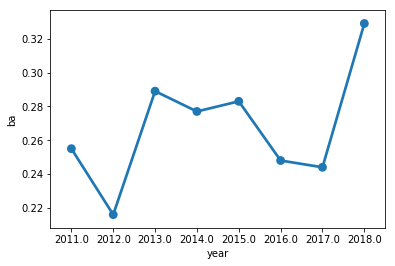

In [16]:
%matplotlib inline
#グラフ化
import seaborn as sns

# 打率(ba)を折れ線グラフに
sns.pointplot(x="year", y="ba", data=atbats)

In [17]:
#セイバーメトリクス出してみる
#OPS(出塁率（'obp'）+長打率（'slg'）)
atbats['ops'] = atbats['obp'] + atbats['slg']

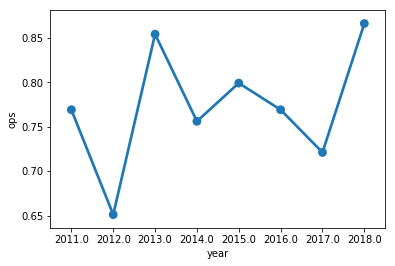

In [18]:
%matplotlib inline
#グラフ化
import seaborn as sns

# OPS('ops')を折れ線グラフに
sns.pointplot(x="year", y="ops", data=atbats)